# Prostate Cancer Prediction

---

## Varun GOR

<h2> Predicting High-Risk Prostate Cancer using K-NN (K- Nearest Neighbors) </h2>

**Data Fields**

1. id
2. diagnosis_result
3. radius
4. texture
5. perimeter
6. area
7. smoothness
8. compactness
9. symmetry
10. fractal_dimension


## Loading the Data

In [7]:
import pandas as pd
import numpy as np

In [9]:
url = 'https://raw.githubusercontent.com/VarunGor/Dataset/master/Prostate_Cancer.csv'

protaste_data = pd.read_csv(url)

In [12]:
print(protaste_data.shape)
protaste_data.head(5)

(100, 10)


,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


## Exploratory Data Analysis (EDA)¶

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt 
%matplotlib inline

In [19]:
protaste_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
id                   100 non-null int64
diagnosis_result     100 non-null object
radius               100 non-null int64
texture              100 non-null int64
perimeter            100 non-null int64
area                 100 non-null int64
smoothness           100 non-null float64
compactness          100 non-null float64
symmetry             100 non-null float64
fractal_dimension    100 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [101]:
protaste_data.corr()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
id,1.000000,0.047276,0.052263,-0.215953,-0.174354,-0.258328,-0.277554,-0.222334,-0.164946
radius,0.047276,1.000000,0.100245,-0.238216,-0.250934,-0.127121,-0.191490,-0.039707,-0.029120
texture,0.052263,0.100245,1.000000,-0.113453,-0.113725,0.102321,0.032446,0.077912,0.139157
perimeter,-0.215953,-0.238216,-0.113453,1.000000,0.976648,0.269442,0.527542,0.195539,-0.195434
area,-0.174354,-0.250934,-0.113725,0.976648,1.000000,0.208438,0.424950,0.110435,-0.274344
smoothness,-0.258328,-0.127121,0.102321,0.269442,0.208438,1.000000,0.465723,0.424203,0.369580
compactness,-0.277554,-0.191490,0.032446,0.527542,0.424950,0.465723,1.000000,0.681123,0.647953
symmetry,-0.222334,-0.039707,0.077912,0.195539,0.110435,0.424203,0.681123,1.000000,0.568608
fractal_dimension,-0.164946,-0.029120,0.139157,-0.195434,-0.274344,0.369580,0.647953,0.568608,1.000000


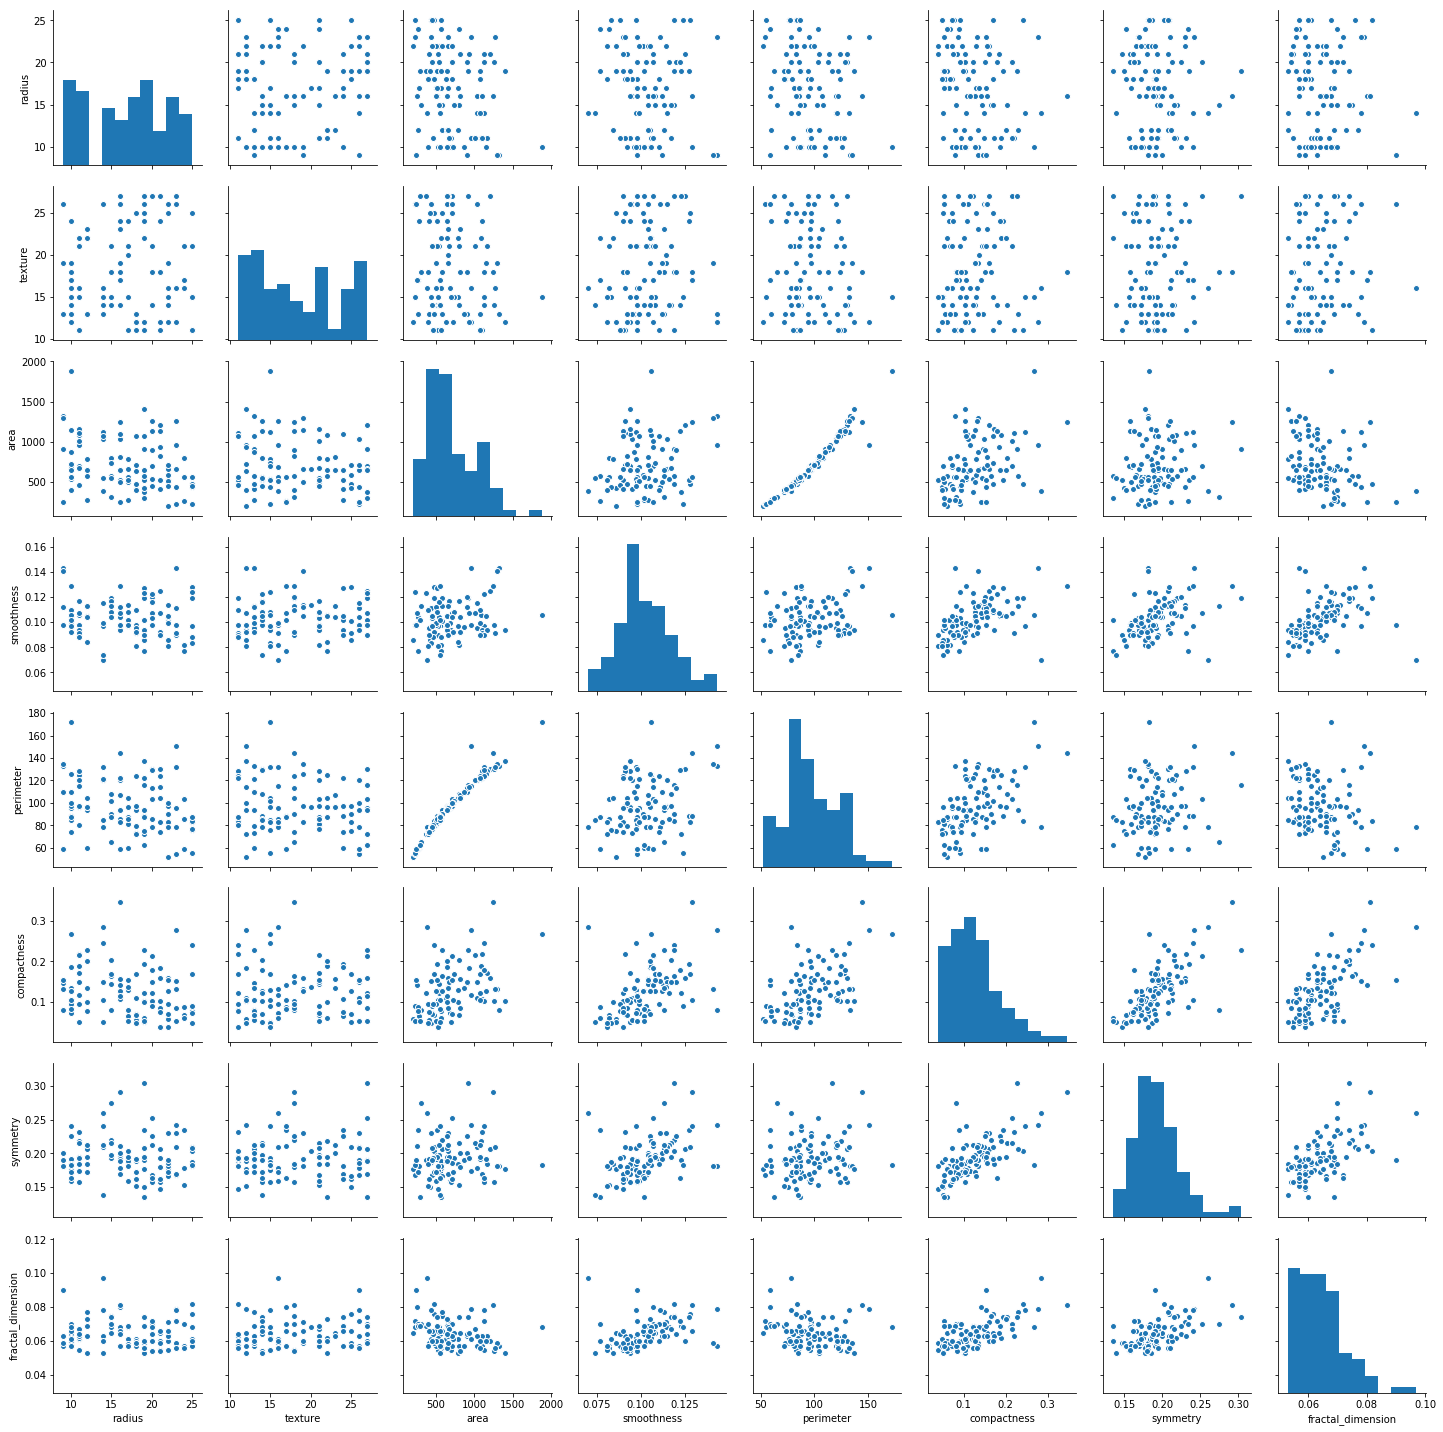

In [25]:
features = ['radius','texture','area','smoothness','perimeter','compactness','symmetry','fractal_dimension']

sb.pairplot(protaste_data[features])

## KNN
Simple KNN Predictor

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [111]:
# create input X(Independent Variable(s)) and output y(Dependent Variable)
y = protaste_data['diagnosis_result']

X = protaste_data[features]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)

In [34]:
# Defining The parameters in KNN Classifier
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    metric='manhattan'
    )

In [35]:
knn_simple = knn.fit(X_train, y_train)

In [36]:
knn_pred=knn_simple.predict(X_test)

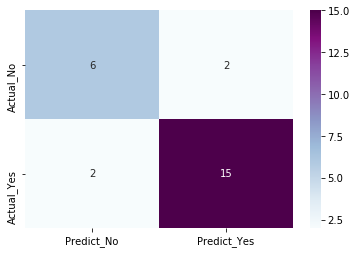

In [37]:
conf =  metrics.confusion_matrix(y_test, knn_pred)

sb.heatmap(conf, cmap ='BuPu', annot=True, fmt='d', xticklabels=['Predict_No', 'Predict_Yes'], yticklabels=['Actual_No','Actual_Yes'])

In [38]:
print("Accuracy :", metrics.accuracy_score(y_test,knn_pred))

print(metrics.classification_report(y_test,knn_pred))

Accuracy : 0.84
             precision    recall  f1-score   support

          B       0.75      0.75      0.75         8
          M       0.88      0.88      0.88        17

avg / total       0.84      0.84      0.84        25



## Parameter Tuning with Grid Search

Grid-searching is the process of scanning the data to configure optimal parameters for a given model.

In [39]:
from sklearn.model_selection import GridSearchCV

In [137]:
# Different parameters to test

n_neighbors = [5,7,9,11,13,15,20]
algorithm  = ['ball_tree', 'kd_tree', 'brute']
metric  = ['euclidean','manhattan','chebyshev', 'minkowski']

In [138]:
grid_knn = KNeighborsClassifier()

# Cross-validation tells how well a model performs on a dataset using multiple samples of train data
grid = GridSearchCV(estimator = grid_knn, 
                    cv=10, 
                    param_grid = dict(n_neighbors = n_neighbors,  algorithm = algorithm, metric=metric))

In [65]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [5, 7, 9, 11, 13, 15, 20], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
# Best parameters for the model
grid.best_params_

{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 9}

In [70]:
knn_optimized = KNeighborsClassifier(
    n_neighbors=9,
    metric = 'euclidean',
    algorithm = 'ball_tree'
    )

In [71]:
knn_opt = knn_optimized.fit(X_train,y_train)

knn_pred = knn_opt.predict(X_test)

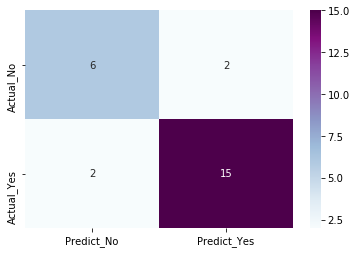

In [72]:
conf =  metrics.confusion_matrix(y_test, knn_pred)

sb.heatmap(conf, cmap ='BuPu', annot=True, fmt='d', xticklabels=['Predict_No', 'Predict_Yes'], yticklabels=['Actual_No','Actual_Yes'])

In [73]:
print("Accuracy :", metrics.accuracy_score(y_test,knn_pred))

print(metrics.classification_report(y_test,knn_pred))

Accuracy : 0.84
             precision    recall  f1-score   support

          B       0.75      0.75      0.75         8
          M       0.88      0.88      0.88        17

avg / total       0.84      0.84      0.84        25



## Feature Engineering

In [104]:
from sklearn import preprocessing

In [160]:
col_name = list(protaste_data)
col_name

['id',
 'diagnosis_result',
 'radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'symmetry',
 'fractal_dimension']

In [239]:
new_features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']
#new_features = ['radius', 'texture', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']
X = protaste_data[new_features]

In [240]:
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

In [241]:
X_n_train, X_n_test, y_train, y_test = train_test_split(normalized_X,y,test_size=0.30,random_state=123)

In [242]:
# standardize the data attributes
standardized_X = preprocessing.scale(X)

In [243]:
X_s_train, X_s_test, y_train, y_test = train_test_split(standardized_X,y,test_size=0.30,random_state=123)

In [271]:
knn_model = KNeighborsClassifier(
    n_neighbors=9,
    metric = 'manhattan',
    algorithm = 'ball_tree'
    )


In [272]:
knn_normalized  = knn_model.fit(X_n_train,y_train)

knn_n_pred = knn_normalized.predict(X_n_test)

In [273]:
print("Accuracy :", metrics.accuracy_score(y_test,knn_n_pred))

print(metrics.classification_report(y_test,knn_n_pred))

Accuracy : 0.7666666666666667
             precision    recall  f1-score   support

          B       0.56      0.62      0.59         8
          M       0.86      0.82      0.84        22

avg / total       0.78      0.77      0.77        30



In [274]:
knn_standardized  = knn_model.fit(X_s_train,y_train)

knn_s_pred = knn_standardized.predict(X_s_test)

In [275]:
print("Accuracy :", metrics.accuracy_score(y_test,knn_s_pred))

print(metrics.classification_report(y_test,knn_s_pred))

Accuracy : 0.9
             precision    recall  f1-score   support

          B       1.00      0.62      0.77         8
          M       0.88      1.00      0.94        22

avg / total       0.91      0.90      0.89        30



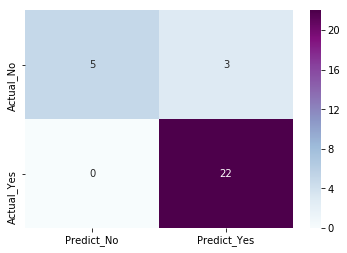

In [269]:
conf =  metrics.confusion_matrix(y_test, knn_s_pred)

sb.heatmap(conf, cmap ='BuPu', annot=True, fmt='d', xticklabels=['Predict_No', 'Predict_Yes'], yticklabels=['Actual_No','Actual_Yes'])